# Photon sieve

In [1]:
from diffractio import np
from diffractio import mm, um

from diffractio.scalar_masks_XY import Scalar_mask_XY

In [2]:
range = 1*mm

num_pixels = 512

x0 = np.linspace(-range/2, range/2, num_pixels)
y0 = np.linspace(-range / 2, range / 2, num_pixels)
wavelength=0.6328


In [22]:
num_holes = 500
radius_hole = 4*um
r_holes = -range / 2 + range * np.random.rand(num_holes,2)


In [23]:
t0 =Scalar_mask_XY(x0,y0,wavelength)
t0.circle(r0=(0, 0), radius=radius_hole)

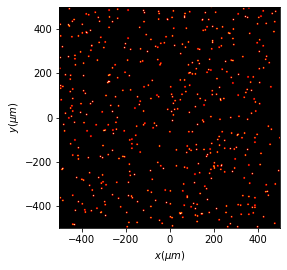

In [24]:
t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.photon_sieve(t0, r_holes)
t1.draw()

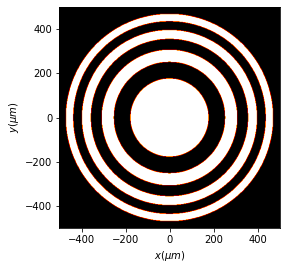

In [25]:
focal = 50*mm

t2 = Scalar_mask_XY(x0, y0, wavelength)
t2.fresnel_lens(r0=(0, 0), focal=focal, kind='amplitude')
t2.pupil()
t2.draw()

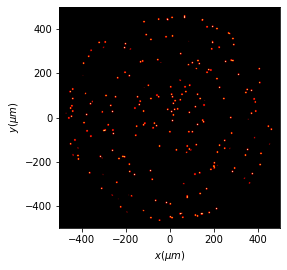

In [26]:
t_obs_ps = t2*t1
t_obs_ps.draw()

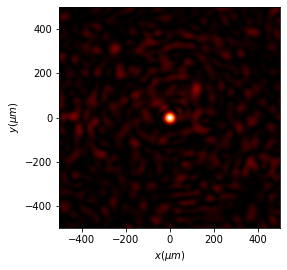

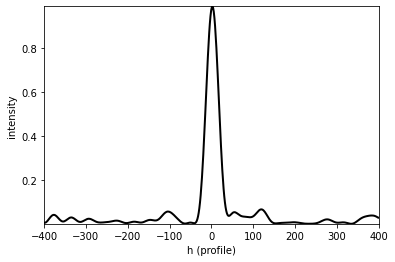

In [27]:
# Propagation to the focal distance

t_plane_ps = t_obs_ps.RS(z=focal)
t_plane_ps.normalize()
t_plane_ps.draw(logarithm=1e1)
t_plane_ps.draw_profile([-400, 0], [400, 0], npixels=512)
